# Import
---

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

# Data
---

In [2]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [3]:
# Number of classes
K = len(set(y_train))
print(K)

10


# Model
---

In [17]:
# Build the model
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu')(i)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4063 - accuracy: 0.4865 - val_loss: 1.2146 - val_accuracy: 0.5721
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9925 - accuracy: 0.6477 - val_loss: 0.8528 - val_accuracy: 0.7124
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8339 - accuracy: 0.7065 - val_loss: 0.7330 - val_accuracy: 0.7501
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7226 - accuracy: 0.7461 - val_loss: 0.7207 - val_accuracy: 0.7501
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6372 - accuracy: 0.7773 - val_loss: 0.6799 - val_accuracy: 0.7660
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5727 - accuracy: 0.7988 - val_loss: 0.6571 - val_accuracy: 0.7803
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5124 - accuracy: 0.8199 - val_loss: 0.6574 -

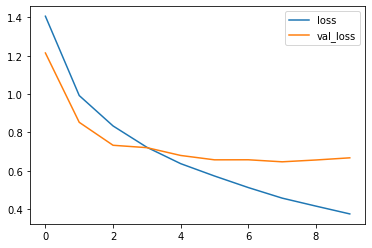

In [18]:
# Plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

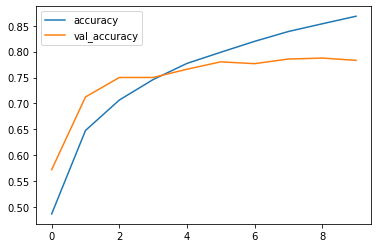

In [19]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [20]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)       